# HydroGeoSines

## How to correct groundwater heads from Earth tides and atmospheric pressure influences


### Import HGS
*Note*: Currently, the HydroGeoSines is not fully implemented as an installable package. Instead. we have to move to the parent directory, to import the package.

In [1]:
import os
os.chdir("../../")
print("Current Working Directory: ", os.getcwd())

Current Working Directory:  /media/daniel/SharedData/Workspaces/GitHub/HydroGeoSines


In [2]:
# Load the HGS package
import hydrogeosines as hgs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import a dataset

*Note*: This example dataset is based on [Rau et. al. (2020)](https://doi.org/10.5194/hess-24-6033-2020):

Import data from a CSV file.

In [3]:
death_valley = hgs.Site('Death Valley', geoloc=[-116.471360, 36.408130, 688])

death_valley.import_csv('tests/data/death_valley/death_valley.csv',
                        input_category=["GW","BP","ET"], 
                        unit=["m","m","nstr"],
                        utc_offset=0, 
                        how="add", check_duplicates=True)

Datetime was 'naive'. Localized and converted to UTC!
A new time series was added ...
No duplicate entries were found.


Just for fun, we invoke [PyGTide](https://github.com/hydrogeoscience/pygtide) to add theoretical Earth tide strains to the dataset:

In [4]:
death_valley.add_ET(et_comp='nstr')

Adding Earth tides using the inbuilt PyGTide package.
ETERNA PREDICT v3.4 (10/02/2013) is calculating, please wait ...
Finished after 3.430 s
Earth tide time series were calculated and added ...


### Correcting groundwater hydraulic heads

Now we can correct the groundwater hydraulic heads:

In [5]:
corrected = hgs.Processing(death_valley).GW_correct(lag_h=8, et_method='hals')

-------------------------------------------------
Method: GW_correct
There were no gaps in the data after resampling!
The groundwater (GW) and  BP data is aligned. There is exactly one BP for every GW entry!
The groundwater (GW) and  BP data is aligned. There is exactly one BP for every GW entry!
-------------------------------------------------
> Correcting GW for location: BLM-1
>> Applying regression deconvolution ...
>> Reference: Method by Rasmussen and Crawford (1997) [https://doi.org/10.1111/j.1745-6584.1997.tb00111.x]
>> Using harmonic least-squares to estimate Earth tide influences ...


### Exporting and visualising the results

The corrected heads are in the results object:

In [6]:
hgs.Output(corrected).export(folder="export")

-------------------------------------------------
Exporting location: BLM-1
>> Writing file(s) to folder: export


{('BLM-1',
  'all'): (                          Datetime [UTC+0.00]  Baro [m] Earth tides [nstr]  \
  datetime                                                                     
  2009-06-25 22:00:00+00:00 2009-06-25 22:00:00  9.494786                NaN   
  2009-06-25 22:15:00+00:00 2009-06-25 22:15:00  9.493441                NaN   
  2009-06-25 22:30:00+00:00 2009-06-25 22:30:00  9.490473                NaN   
  2009-06-25 22:45:00+00:00 2009-06-25 22:45:00  9.489662                NaN   
  2009-06-25 23:00:00+00:00 2009-06-25 23:00:00  9.490956                NaN   
  ...                                       ...       ...                ...   
  2009-12-16 15:30:00+00:00 2009-12-16 15:30:00  9.655353                NaN   
  2009-12-16 15:45:00+00:00 2009-12-16 15:45:00  9.656525                NaN   
  2009-12-16 16:00:00+00:00 2009-12-16 16:00:00  9.656757                NaN   
  2009-12-16 16:15:00+00:00 2009-12-16 16:15:00  9.657581                NaN   
  2009-12-16 16:30:0

This will write a comma seperated value (csv) file to the subfolder 'export'.

The results can also be visualised:

-------------------------------------------------
Plotting location: BLM-1
>> Writing files to folder: export


{('BLM-1', 'all'): (<Figure size 432x288 with 1 Axes>,
  <Figure size 432x288 with 2 Axes>)}

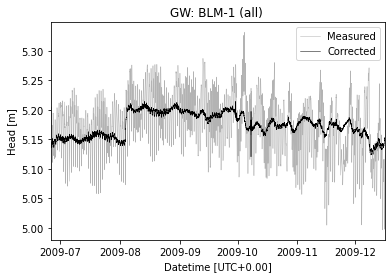

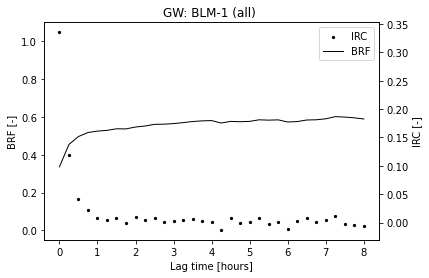

In [7]:
hgs.Output(corrected).plot(folder="export")